# Creating Wins Above Replacement Projections

In [172]:
#importing packages

import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

#removing warning messages for cleaner presentation
import warnings
warnings.filterwarnings("ignore")

In [173]:
#importing our previously created projection dataframe(df)

df = pd.read_csv('https://raw.githubusercontent.com/JoshKepler/Portfolio/main/NFL%20Project/Output%20Results/combined_proj.csv')

In [174]:
#specifying & filtering the columns we would like to use in our df

war_df = df[['player_name', 'pos', 'season', 'completions_y_pred_gbf',
       'attempts_y_pred_gbf', 'passing_yards_y_pred_gbf',
       'passing_tds_y_pred_gbf', 'interceptions_y_pred_gbf',
       'sacks_y_pred_gbf', 'sack_yards_y_pred_gbf', 'sack_fumbles_y_pred_gbf',
       'sack_fumbles_lost_y_pred_gbf', 'passing_air_yards_y_pred_gbf',
       'passing_yards_after_catch_y_pred_gbf',
       'passing_first_downs_y_pred_gbf', 'passing_epa_y_pred_gbf',
       'passing_2pt_conversions_y_pred_gbf', 'pacr_y_pred_gbf',
       'dakota_y_pred_gbf', 'carries_y_pred_gbf', 'rushing_yards_y_pred_gbf',
       'rushing_tds_y_pred_gbf', 'rushing_fumbles_y_pred_gbf',
       'rushing_fumbles_lost_y_pred_gbf', 'rushing_first_downs_y_pred_gbf',
       'rushing_epa_y_pred_gbf', 'rushing_2pt_conversions_y_pred_gbf',
       'receptions_y_pred_gbf', 'targets_y_pred_gbf',
       'receiving_yards_y_pred_gbf', 'receiving_tds_y_pred_gbf',
       'receiving_fumbles_y_pred_gbf', 'receiving_fumbles_lost_y_pred_gbf',
       'receiving_air_yards_y_pred_gbf',
       'receiving_yards_after_catch_y_pred_gbf',
       'receiving_first_downs_y_pred_gbf', 'receiving_epa_y_pred_gbf',
       'receiving_2pt_conversions_y_pred_gbf', 'racr_y_pred_gbf',
       'target_share_y_pred_gbf', 'air_yards_share_y_pred_gbf',
       'wopr_x_y_pred_gbf', 'special_teams_tds_y_pred_gbf',
       'fantasy_points_y_pred_gbf', 'fantasy_points_ppr_y_pred_gbf',
       'tgt_sh_y_pred_gbf', 'ay_sh_y_pred_gbf',
       'yac_sh_y_pred_gbf', 'wopr_y_y_pred_gbf', 'ry_sh_y_pred_gbf',
       'rtd_sh_y_pred_gbf', 'rfd_sh_y_pred_gbf', 'rtdfd_sh_y_pred_gbf',
       'dom_y_pred_gbf', 'w8dom_y_pred_gbf', 'yptmpa_y_pred_gbf',
       'ppr_sh_y_pred_gbf','games_y_pred_gbf']]

In [175]:
#Previewing df

war_df

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,wopr_y_y_pred_gbf,ry_sh_y_pred_gbf,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf
0,Aaron Rodgers,QB,2024.0,178.26,271.95,2358.46,19.24,8.60,13.74,102.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,9.44
1,Joe Flacco,QB,2024.0,48.28,61.71,753.81,3.45,1.91,4.60,36.31,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,3.26
2,Matthew Stafford,QB,2024.0,348.20,500.88,3532.07,23.28,8.78,28.88,203.56,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.18,14.78
3,Brian Hoyer,QB,2024.0,24.68,45.56,233.37,2.01,1.19,2.61,20.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,3.07
4,Blaine Gabbert,QB,2024.0,73.96,72.72,403.06,2.35,1.19,3.04,21.48,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Erik Ezukanma,WR,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.07,0.01,0.04,0.07,0.06,0.03,0.21,0.04,5.19
549,Cole Turner,TE,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.01,0.01,0.02,0.01,0.01,0.11,0.00,5.81
550,Jalen Tolbert,WR,2024.0,-0.00,0.10,-0.01,0.00,0.00,0.00,0.00,...,0.08,0.01,0.01,0.02,0.01,0.00,0.02,-0.03,0.01,2.87
551,Isaiah Spiller,RB,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.12,0.04,9.25


In [176]:
#creating a scoring dictionary, lineup positions dictionary & a variable for how many teams are in the league

#ppdate your league scorring settings here
scoring_dict = {
'passing_yards_y_pred_gbf':.04,
'passing_tds_y_pred_gbf':6, 
'interceptions_y_pred_gbf':-1,
'sack_fumbles_y_pred_gbf':-1,
'sack_fumbles_lost_y_pred_gbf':-2,
'passing_2pt_conversions_y_pred_gbf':2,
'carries_y_pred_gbf':.1,
'rushing_yards_y_pred_gbf':.1,
'rushing_tds_y_pred_gbf':6, 
'rushing_fumbles_y_pred_gbf':-1,
'rushing_fumbles_lost_y_pred_gbf':-2, 
'rushing_first_downs_y_pred_gbf':0,
'rushing_2pt_conversions_y_pred_gbf':2,
'receptions_y_pred_gbf':.5,
'receiving_yards_y_pred_gbf':.1,
'receiving_tds_y_pred_gbf':6,
'receiving_fumbles_y_pred_gbf':-1, 
'receiving_fumbles_lost_y_pred_gbf':-2,
'receiving_first_downs_y_pred_gbf':0,
'receiving_2pt_conversions_y_pred_gbf':2
}

#update your starting lineup requirements here
lineup_dict = {
    'QB' : 2,
    'RB' : 2,
    'WR' : 2,
    'TE' : 1,
    'Flex' : 3,
}

#update how many teams are in your fantasy league
num_of_teams = 12

In [177]:
#Filtering by player projected to play 4 or more games. This will remove most of the outliers

war_df = war_df[war_df['games_y_pred_gbf'] >= 4]

war_df['fantasy_points_proj'] = war_df[scoring_dict.keys()].mul(list(scoring_dict.values()), axis=1).sum(axis=1)

#Tightend Premium Option Here
te_prem = 0.5
war_df['fantasy_points_proj'] = np.where(war_df['pos'] == 'TE', war_df['fantasy_points_proj'] + (te_prem * war_df['receptions_y_pred_gbf']) ,war_df['fantasy_points_proj'])

#creating scoring per game projection
war_df['fantasy_points_proj/G'] = war_df['fantasy_points_proj'] / war_df['games_y_pred_gbf']

war_df = war_df.sort_values(by='fantasy_points_proj/G', ascending=False)
war_df

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rtd_sh_y_pred_gbf,rfd_sh_y_pred_gbf,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G
35,Baker Mayfield,QB,2024.0,230.88,329.73,2837.50,22.50,7.89,28.50,176.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.16,7.65,244.7440,31.992680
429,Dorian Thompson-Robinson,QB,2024.0,164.55,308.15,2097.38,15.30,3.48,16.95,129.96,...,0.00,0.00,0.00,0.00,0.00,0.00,0.08,5.90,186.9102,31.679695
330,Michael Penix Jr.,QB,2024.0,162.49,292.84,2171.45,24.03,7.75,16.21,139.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.18,7.58,237.0850,31.277704
34,Lamar Jackson,QB,2024.0,139.99,227.69,1949.59,20.28,7.68,19.33,135.26,...,0.06,0.01,0.01,0.02,0.02,0.05,0.14,8.66,260.6016,30.092564
11,Geno Smith,QB,2024.0,219.43,333.10,2788.42,27.75,6.63,21.63,153.02,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.18,10.09,286.1998,28.364698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Ihmir Smith-Marsette,WR,2024.0,-0.00,-0.02,-0.12,-0.00,0.00,0.00,0.00,...,0.03,0.03,0.02,0.05,0.04,0.34,0.02,8.20,14.1552,1.726244
202,KhaDarel Hodge,WR,2024.0,-0.00,0.01,-0.09,-0.00,-0.00,0.00,0.00,...,0.09,0.07,0.06,0.05,0.06,0.37,0.04,6.15,9.6014,1.561203
100,Trayveon Williams,RB,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.03,0.03,0.05,0.06,0.27,0.05,9.56,14.6880,1.536402
133,Adam Prentice,RB,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.03,0.03,0.04,0.04,0.27,0.03,5.93,9.0540,1.526813


In [178]:
#creating positional dfs

qb_df = war_df[war_df['pos'] == 'QB']
rb_df = war_df[war_df['pos'] == 'RB']
wr_df = war_df[war_df['pos'] == 'WR']
te_df = war_df[war_df['pos'] == 'TE']
flex_df = war_df[war_df['pos'] != 'QB']

In [179]:
#creating positional df and collecting variable for future use like mean, min & std
qb_war_df = qb_df.head((lineup_dict['QB']*num_of_teams))
qb_lineup_mean = qb_war_df['fantasy_points_proj/G'].mean()
qb_lineup_min = qb_war_df['fantasy_points_proj/G'].min()
qb_lineup_std = qb_war_df['fantasy_points_proj/G'].std()

In [180]:
rb_war_df = rb_df.head((lineup_dict['RB']*num_of_teams))
rb_lineup_mean = rb_war_df['fantasy_points_proj/G'].mean()
rb_lineup_min = rb_war_df['fantasy_points_proj/G'].min()
rb_lineup_std = rb_war_df['fantasy_points_proj/G'].std()

In [181]:
wr_war_df = wr_df.head((lineup_dict['WR']*num_of_teams))
wr_lineup_mean = wr_war_df['fantasy_points_proj/G'].mean()
wr_lineup_min = wr_war_df['fantasy_points_proj/G'].min()
wr_lineup_std = wr_war_df['fantasy_points_proj/G'].std()

In [182]:
te_war_df = te_df.head((lineup_dict['TE']*num_of_teams))
te_lineup_mean = te_war_df['fantasy_points_proj/G'].mean()
te_lineup_min = te_war_df['fantasy_points_proj/G'].min()
te_lineup_std = te_war_df['fantasy_points_proj/G'].std()

In [183]:
#creating a flex df is a little trickier since we want to remove qbs from this and specify a range to pull players from
flex_search_start = (lineup_dict['RB']*num_of_teams) + (lineup_dict['WR']*num_of_teams) + (lineup_dict['TE']*num_of_teams)
flex_search_end = (lineup_dict['RB']*num_of_teams) + (lineup_dict['WR']*num_of_teams) + (lineup_dict['TE']*num_of_teams) + (lineup_dict['Flex']*num_of_teams)

flex_war_df = war_df[war_df['pos'] != 'QB']
flex_war_df = flex_war_df[flex_search_start:flex_search_end]
flex_lineup_mean = flex_war_df['fantasy_points_proj/G'].mean()
flex_lineup_min = flex_war_df['fantasy_points_proj/G'].min()
flex_lineup_std = flex_war_df['fantasy_points_proj/G'].std()

# Projected Weekly Lineup Scoring

In [184]:
#Creating a projection for average lineup scoring & standard deviation of the scoring
avg_lineup_proj = (qb_lineup_mean * lineup_dict['QB']) + (rb_lineup_mean * lineup_dict['RB']) + (wr_lineup_mean * lineup_dict['WR']) + (te_lineup_mean * lineup_dict['TE']) + (flex_lineup_mean * lineup_dict['Flex'])
print('Projected Average Lineup Score:', avg_lineup_proj)

std_lineup_proj = ((qb_lineup_std**2)*lineup_dict['QB'] + (rb_lineup_std**2)*lineup_dict['RB'] + (wr_lineup_std**2)*lineup_dict['WR'] + (te_lineup_std**2)*lineup_dict['TE'] + (flex_lineup_std**2)*lineup_dict['Flex'])**.5
print('Projected Standard Deviation Lineup Score:', std_lineup_proj)

Projected Average Lineup Score: 154.01524783110315
Projected Standard Deviation Lineup Score: 8.264246621383576


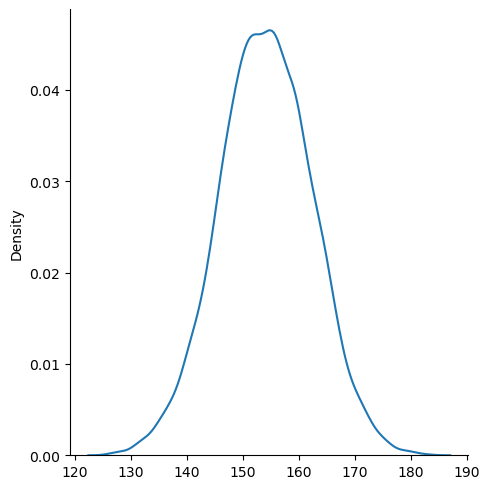

In [185]:
#creating a visual of the projected weekly lineup scoring
samples = np.random.normal(avg_lineup_proj, std_lineup_proj, 10000)
sns.displot(samples, kind='kde')

# The formula and application of Wins Above Replacement (WAR)

With the cells below, we will be creating wins above replacement (WAR) columns for each positional df. 

To create this stat we will use:(avg_line_score-individual_position_avg_pts) + the players projected points per game. 

This will find the point differential the player creates based on the positional average in the projected lineup. 

From here we will input it into a cummlative distribution formula to output the likelihood this play will win the week by themselves.

The tables will provide each positional top 10 WAR players

In [186]:
qb_df['WAR/G'] =  norm.cdf((avg_lineup_proj-qb_lineup_mean)+qb_df['fantasy_points_proj/G'], avg_lineup_proj, std_lineup_proj)-.5
qb_df['WAR'] = qb_df['WAR/G']*qb_df['games_y_pred_gbf']
qb_df.sort_values(by='WAR', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR
35,Baker Mayfield,QB,2024.0,230.88,329.73,2837.50,22.50,7.89,28.50,176.51,...,0.00,0.00,0.00,0.00,0.16,7.65,244.7440,31.992680,0.326183,2.495296
330,Michael Penix Jr.,QB,2024.0,162.49,292.84,2171.45,24.03,7.75,16.21,139.26,...,0.00,0.00,0.00,0.00,0.18,7.58,237.0850,31.277704,0.303079,2.297343
34,Lamar Jackson,QB,2024.0,139.99,227.69,1949.59,20.28,7.68,19.33,135.26,...,0.01,0.02,0.02,0.05,0.14,8.66,260.6016,30.092564,0.260920,2.259571
11,Geno Smith,QB,2024.0,219.43,333.10,2788.42,27.75,6.63,21.63,153.02,...,0.00,-0.00,-0.00,-0.00,0.18,10.09,286.1998,28.364698,0.191529,1.932529
429,Dorian Thompson-Robinson,QB,2024.0,164.55,308.15,2097.38,15.30,3.48,16.95,129.96,...,0.00,0.00,0.00,0.00,0.08,5.90,186.9102,31.679695,0.316289,1.866108
45,Justin Herbert,QB,2024.0,300.43,493.57,3471.10,22.92,6.70,29.78,212.80,...,0.00,-0.00,-0.00,-0.01,0.20,11.55,289.0760,25.028225,0.038425,0.443804
25,Taysom Hill,QB,2024.0,135.40,147.56,1476.19,10.05,4.29,14.35,106.63,...,0.00,0.02,0.04,0.32,0.07,5.51,142.1096,25.791216,0.074871,0.412541
44,Jordan Love,QB,2024.0,171.99,274.54,2157.66,13.02,8.92,18.69,111.27,...,0.00,-0.00,-0.00,-0.00,0.13,6.46,164.8364,25.516471,0.061804,0.399255
36,Josh Allen,QB,2024.0,363.58,496.60,3840.30,16.13,9.98,34.81,240.64,...,0.01,0.02,0.02,0.04,0.17,12.98,317.8840,24.490293,0.012514,0.162437
46,Jalen Hurts,QB,2024.0,280.34,414.44,2350.73,18.93,10.40,28.68,214.29,...,0.02,0.05,0.03,0.08,0.16,12.47,303.5262,24.340513,0.005286,0.065916


In [187]:
rb_df['WAR/G'] =  norm.cdf((avg_lineup_proj-rb_lineup_mean)+rb_df['fantasy_points_proj/G'], avg_lineup_proj, std_lineup_proj)-.5
rb_df['WAR'] = rb_df['WAR/G']*rb_df['games_y_pred_gbf']
rb_df.sort_values(by='WAR', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR
431,Jahmyr Gibbs,RB,2024.0,0.00,0.16,0.00,0.0,0.0,0.0,0.0,...,0.09,0.12,0.10,0.81,0.20,12.85,254.4260,19.799689,0.166674,2.141767
492,Rachaad White,RB,2024.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.13,0.15,0.14,0.94,0.24,15.79,297.0530,18.812730,0.122223,1.929896
432,Bijan Robinson,RB,2024.0,0.00,0.17,0.00,0.0,0.0,0.0,0.0,...,0.12,0.09,0.11,0.85,0.23,11.19,216.8170,19.375961,0.147833,1.654250
493,James Cook,RB,2024.0,0.15,0.00,2.57,0.0,0.0,0.0,0.0,...,0.09,0.12,0.08,0.54,0.17,15.08,279.4128,18.528700,0.109093,1.645118
490,Kyren Williams,RB,2024.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.04,0.07,0.06,0.47,0.13,8.91,178.4170,20.024355,0.176500,1.572616
430,Tyjae Spears,RB,2024.0,0.00,0.02,0.00,0.0,0.0,0.0,0.0,...,0.10,0.10,0.10,0.87,0.16,9.48,187.0480,19.730802,0.163638,1.551291
494,Brian Robinson,RB,2024.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.09,0.06,0.08,0.55,0.17,12.20,209.2510,17.151721,0.043929,0.535929
76,Austin Ekeler,RB,2024.0,0.00,0.04,0.00,0.0,0.0,0.0,0.0,...,0.09,0.07,0.09,0.70,0.08,8.77,151.4000,17.263398,0.049283,0.432210
436,Tank Bigsby,RB,2024.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.02,0.04,0.02,0.17,0.11,8.39,143.4840,17.101788,0.041532,0.348454
496,Kenneth Walker,RB,2024.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.08,0.13,0.11,0.74,0.19,14.83,247.0150,16.656440,0.020100,0.298089


In [188]:
wr_df['WAR/G'] =  norm.cdf((avg_lineup_proj-wr_lineup_mean)+wr_df['fantasy_points_proj/G'], avg_lineup_proj, std_lineup_proj)-.5
wr_df['WAR'] = wr_df['WAR/G']*wr_df['games_y_pred_gbf']
wr_df.sort_values(by='WAR', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR
201,D.J. Moore,WR,2024.0,0.19,0.30,0.15,0.05,0.31,0.00,0.00,...,0.31,0.31,0.31,1.99,0.17,8.91,223.8330,25.121549,0.398388,3.549637
234,Justin Jefferson,WR,2024.0,0.34,0.82,7.48,0.53,0.08,0.00,0.00,...,0.32,0.35,0.34,2.79,0.22,10.97,226.9532,20.688532,0.269138,2.952444
238,CeeDee Lamb,WR,2024.0,-0.01,0.02,-0.18,-0.01,0.03,1.00,3.02,...,0.32,0.28,0.32,2.69,0.20,15.49,280.4238,18.103538,0.163932,2.539308
172,Tyreek Hill,WR,2024.0,0.18,0.96,1.30,0.19,0.33,0.00,3.82,...,0.35,0.31,0.35,2.53,0.21,15.28,252.5850,16.530432,0.092068,1.406798
221,A.J. Brown,WR,2024.0,-0.03,0.29,-0.06,0.00,0.05,0.00,0.00,...,0.33,0.31,0.34,2.38,0.20,15.54,254.5706,16.381634,0.085063,1.321876
434,Puka Nacua,WR,2024.0,1.57,1.40,30.07,0.00,0.00,0.32,4.88,...,0.30,0.28,0.29,2.06,0.20,14.76,239.9148,16.254390,0.079051,1.166790
495,George Pickens,WR,2024.0,0.01,-0.02,-0.04,-0.00,0.00,1.00,8.00,...,0.22,0.18,0.23,1.88,0.15,9.25,145.2644,15.704259,0.052863,0.488983
158,Stefon Diggs,WR,2024.0,0.02,0.52,1.28,0.00,0.00,0.00,0.00,...,0.30,0.31,0.33,2.30,0.20,15.00,224.6422,14.976147,0.017864,0.267965
437,Rashee Rice,WR,2024.0,0.01,0.01,0.00,0.00,0.00,0.02,2.23,...,0.27,0.22,0.29,1.93,0.17,12.93,191.5880,14.817324,0.010202,0.131916
152,Davante Adams,WR,2024.0,0.24,1.36,2.74,0.27,0.49,0.00,0.00,...,0.32,0.33,0.31,2.20,0.18,13.49,196.4856,14.565278,-0.001964,-0.026490


In [189]:
te_df['WAR/G'] =  norm.cdf((avg_lineup_proj-te_lineup_mean)+te_df['fantasy_points_proj/G'], avg_lineup_proj, std_lineup_proj)-.5
te_df['WAR'] = te_df['WAR/G']*te_df['games_y_pred_gbf']
te_df.sort_values(by='WAR', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,rtdfd_sh_y_pred_gbf,dom_y_pred_gbf,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR
263,Travis Kelce,TE,2024.0,0.10,0.05,0.44,0.0,0.00,0.0,0.0,...,0.24,0.20,0.19,1.71,0.14,15.79,261.9666,16.590665,0.188626,2.978412
277,George Kittle,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.22,0.21,0.23,1.73,0.15,16.06,236.1110,14.701806,0.103880,1.668312
283,David Njoku,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.19,0.17,0.18,1.23,0.13,13.23,199.8260,15.104006,0.122506,1.620761
282,Evan Engram,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.17,0.18,0.16,1.33,0.13,11.83,175.5400,14.838546,0.110242,1.304159
297,T.J. Hockenson,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.21,0.23,0.23,1.52,0.13,14.53,204.4270,14.069305,0.074118,1.076935
446,Sam LaPorta,TE,2024.0,0.04,0.02,0.16,0.0,0.06,0.0,0.0,...,0.20,0.20,0.16,1.41,0.10,9.47,125.6044,13.263400,0.035599,0.337119
292,Mark Andrews,TE,2024.0,0.41,1.31,1.71,0.0,0.00,0.0,0.0,...,0.26,0.11,0.10,1.35,0.12,10.83,123.3734,11.391819,-0.054530,-0.590565
517,James Mitchell,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.05,0.06,0.06,0.44,0.04,6.22,61.4530,9.879904,-0.125540,-0.780856
300,Donald Parham,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.04,0.12,0.07,0.46,0.04,4.56,32.2850,7.080044,-0.245005,-1.117224
281,Jonnu Smith,TE,2024.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.13,0.13,0.09,0.73,0.07,9.58,95.2840,9.946138,-0.122498,-1.173531


In [190]:
#combining the positional WAR dfs

df_list = [qb_df,rb_df,wr_df,te_df]
combined_df = pd.DataFrame()

for df in df_list:
    combined_df = pd.concat([combined_df,df])

combined_df['WAR/G_ranked'] = combined_df['WAR/G'].rank(ascending=False)
combined_df['WAR_ranked'] = combined_df['WAR'].rank(ascending=False)

combined_df = combined_df.round(2)

# WAR outcomes

In [191]:
#top 10 WAR per game table

combined_df.sort_values(by='WAR/G', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR,WAR/G_ranked,WAR_ranked
201,D.J. Moore,WR,2024.0,0.19,0.30,0.15,0.05,0.31,0.00,0.00,...,0.31,1.99,0.17,8.91,223.83,25.12,0.40,3.55,1.0,1.0
35,Baker Mayfield,QB,2024.0,230.88,329.73,2837.50,22.50,7.89,28.50,176.51,...,0.00,0.00,0.16,7.65,244.74,31.99,0.33,2.50,2.0,5.0
429,Dorian Thompson-Robinson,QB,2024.0,164.55,308.15,2097.38,15.30,3.48,16.95,129.96,...,0.00,0.00,0.08,5.90,186.91,31.68,0.32,1.87,3.0,11.0
330,Michael Penix Jr.,QB,2024.0,162.49,292.84,2171.45,24.03,7.75,16.21,139.26,...,0.00,0.00,0.18,7.58,237.08,31.28,0.30,2.30,4.0,6.0
234,Justin Jefferson,WR,2024.0,0.34,0.82,7.48,0.53,0.08,0.00,0.00,...,0.34,2.79,0.22,10.97,226.95,20.69,0.27,2.95,5.0,3.0
34,Lamar Jackson,QB,2024.0,139.99,227.69,1949.59,20.28,7.68,19.33,135.26,...,0.02,0.05,0.14,8.66,260.60,30.09,0.26,2.26,6.0,7.0
263,Travis Kelce,TE,2024.0,0.10,0.05,0.44,0.00,0.00,0.00,0.00,...,0.19,1.71,0.14,15.79,261.97,16.59,0.19,2.98,8.0,2.0
11,Geno Smith,QB,2024.0,219.43,333.10,2788.42,27.75,6.63,21.63,153.02,...,-0.00,-0.00,0.18,10.09,286.20,28.36,0.19,1.93,7.0,9.0
490,Kyren Williams,RB,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.06,0.47,0.13,8.91,178.42,20.02,0.18,1.57,9.0,16.0
431,Jahmyr Gibbs,RB,2024.0,0.00,0.16,0.00,0.00,0.00,0.00,0.00,...,0.10,0.81,0.20,12.85,254.43,19.80,0.17,2.14,10.0,8.0


<Axes: xlabel='WAR/G_ranked', ylabel='WAR/G'>

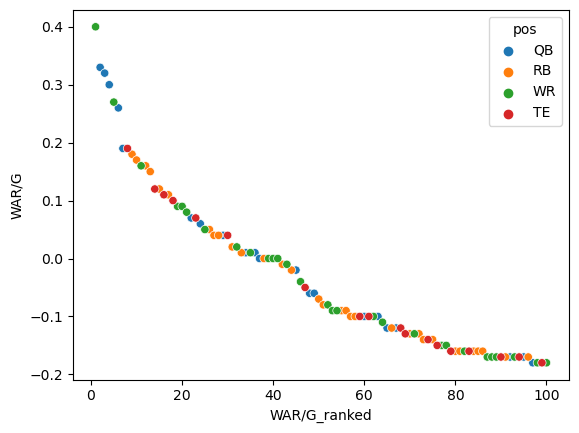

In [192]:
#top 100 WAR per game graph

sns.scatterplot(combined_df[combined_df['WAR/G_ranked']<=100], x='WAR/G_ranked', y='WAR/G', hue='pos')

In [193]:
#top 10 overall WAR table

combined_df.sort_values(by='WAR', ascending=False).head(10)

,player_name,pos,season,completions_y_pred_gbf,attempts_y_pred_gbf,passing_yards_y_pred_gbf,passing_tds_y_pred_gbf,interceptions_y_pred_gbf,sacks_y_pred_gbf,sack_yards_y_pred_gbf,...,w8dom_y_pred_gbf,yptmpa_y_pred_gbf,ppr_sh_y_pred_gbf,games_y_pred_gbf,fantasy_points_proj,fantasy_points_proj/G,WAR/G,WAR,WAR/G_ranked,WAR_ranked
201,D.J. Moore,WR,2024.0,0.19,0.30,0.15,0.05,0.31,0.00,0.00,...,0.31,1.99,0.17,8.91,223.83,25.12,0.40,3.55,1.0,1.0
263,Travis Kelce,TE,2024.0,0.10,0.05,0.44,0.00,0.00,0.00,0.00,...,0.19,1.71,0.14,15.79,261.97,16.59,0.19,2.98,8.0,2.0
234,Justin Jefferson,WR,2024.0,0.34,0.82,7.48,0.53,0.08,0.00,0.00,...,0.34,2.79,0.22,10.97,226.95,20.69,0.27,2.95,5.0,3.0
238,CeeDee Lamb,WR,2024.0,-0.01,0.02,-0.18,-0.01,0.03,1.00,3.02,...,0.32,2.69,0.20,15.49,280.42,18.10,0.16,2.54,11.0,4.0
35,Baker Mayfield,QB,2024.0,230.88,329.73,2837.50,22.50,7.89,28.50,176.51,...,0.00,0.00,0.16,7.65,244.74,31.99,0.33,2.50,2.0,5.0
330,Michael Penix Jr.,QB,2024.0,162.49,292.84,2171.45,24.03,7.75,16.21,139.26,...,0.00,0.00,0.18,7.58,237.08,31.28,0.30,2.30,4.0,6.0
34,Lamar Jackson,QB,2024.0,139.99,227.69,1949.59,20.28,7.68,19.33,135.26,...,0.02,0.05,0.14,8.66,260.60,30.09,0.26,2.26,6.0,7.0
431,Jahmyr Gibbs,RB,2024.0,0.00,0.16,0.00,0.00,0.00,0.00,0.00,...,0.10,0.81,0.20,12.85,254.43,19.80,0.17,2.14,10.0,8.0
11,Geno Smith,QB,2024.0,219.43,333.10,2788.42,27.75,6.63,21.63,153.02,...,-0.00,-0.00,0.18,10.09,286.20,28.36,0.19,1.93,7.0,9.0
492,Rachaad White,RB,2024.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.14,0.94,0.24,15.79,297.05,18.81,0.12,1.93,15.0,10.0


<Axes: xlabel='WAR_ranked', ylabel='WAR'>

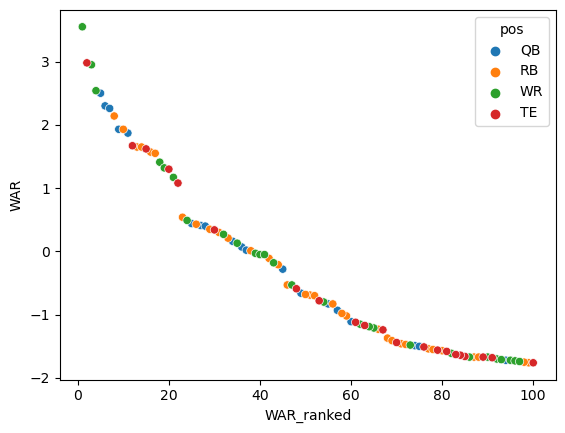

In [194]:
#top 100 overall WAR graph

sns.scatterplot(combined_df[combined_df['WAR_ranked']<=100], x='WAR_ranked', y='WAR', hue='pos')

In [195]:
#option to export WAR df to a csv file

combined_df.to_csv('WAR_combined_df.csv')